In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression, SelectFromModel
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, cross_validate
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.linear_model import Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.preprocessing import StandardScaler
import math

### Exploratory Data Analysis

In [2]:
data_X1 = pd.read_csv("E:\Masters\Lp4\Statistical Learning for Big Data\Final exam\Q2\Q2_X1.csv")
data_X2 = pd.read_csv("E:\Masters\Lp4\Statistical Learning for Big Data\Final exam\Q2\Q2_X2.csv")
data_y = pd.read_csv("E:\Masters\Lp4\Statistical Learning for Big Data\Final exam\Q2\Q2_y.csv")
data_X1_X2 = pd.concat([data_X1, data_X2], axis = 1)

scaler = StandardScaler()
data_X1_scaled = scaler.fit_transform(data_X1)
data_X1_X2_scaled = scaler.fit_transform(data_X1_X2)

In [3]:
print(f"X1 has {data_X1.shape[1]} features ranging from D1 to D{data_X1.shape[1]}. ")
print(f"X2 has {data_X2.shape[1]} features ranging from D{data_X1.shape[1]+1} to D{data_X1.shape[1]+100}. ")
print(f"The number of samples is {data_y.shape[0]}.")

X1 has 160 features ranging from D1 to D160. 
X2 has 100 features ranging from D161 to D260. 
The number of samples is 209.


In [4]:
duplicate_X1 = ~data_X1.duplicated()

In [5]:
duplicate_X1

0      True
1      True
2      True
3      True
4      True
       ... 
204    True
205    True
206    True
207    True
208    True
Length: 209, dtype: bool

In [6]:
X1_mean = data_X1.mean(axis = 0)
X2_mean = data_X2.mean(axis = 0)
X1_X2_mean = data_X1_X2.mean(axis = 0)

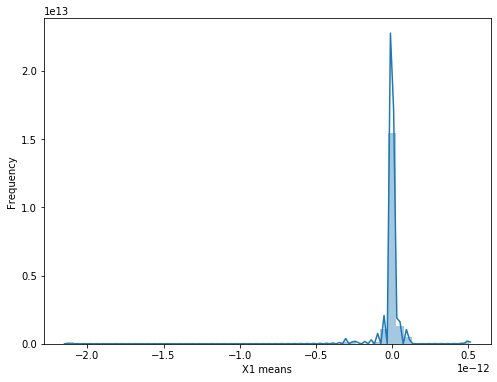

In [7]:
plt.figure(figsize = (8,6))
plt.xlabel('X1 means')
plt.ylabel('Frequency')
sns.distplot(a = X1_mean)

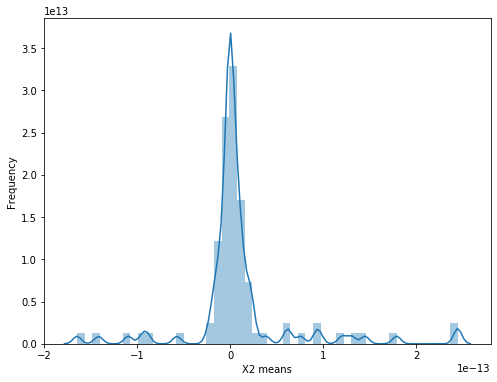

In [8]:
plt.figure(figsize = (8,6))
plt.xlabel('X2 means')
plt.ylabel('Frequency')
sns.distplot(a = X2_mean)

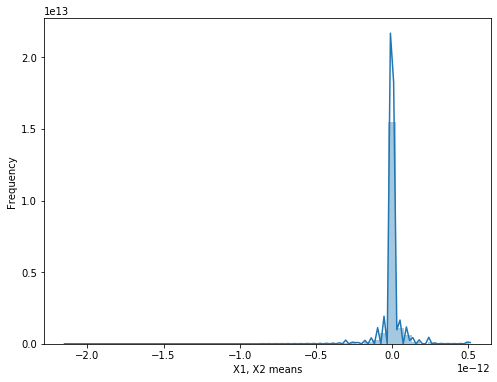

In [9]:
plt.figure(figsize = (8,6))
plt.xlabel('X1, X2 means')
plt.ylabel('Frequency')
sns.distplot(a = X1_X2_mean)

Our objectives are to determine the most important features using only the features from X1, and then also determine the most important features by using the features in both X1 and X2. There are multiple methods to do this.

In [10]:
X1_var = data_X1.var(axis = 0)
X2_var = data_X2.var(axis = 0)
X1_X2_var = data_X1_X2.var(axis = 0)

In [11]:
X1_var.describe()

count       160.000000
mean      23609.905057
std       38298.328862
min           4.973081
25%        1515.251736
50%        7764.538890
75%       29640.081109
max      264118.528269
dtype: float64

In [12]:
X2_var.describe()

count       100.000000
mean      25918.069252
std       28747.363738
min          23.680695
25%        7062.306028
50%       15535.651409
75%       38132.978296
max      141841.294297
dtype: float64

In [13]:
X1_X2_var.describe()

count       260.000000
mean      24497.660517
std       34894.086405
min           4.973081
25%        3730.507266
50%       11866.463080
75%       32635.324067
max      264118.528269
dtype: float64

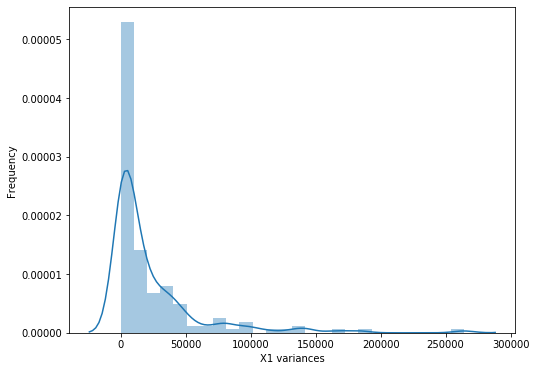

In [14]:
plt.figure(figsize = (8,6))
plt.xlabel('X1 variances')
plt.ylabel('Frequency')
sns.distplot(a = X1_var)

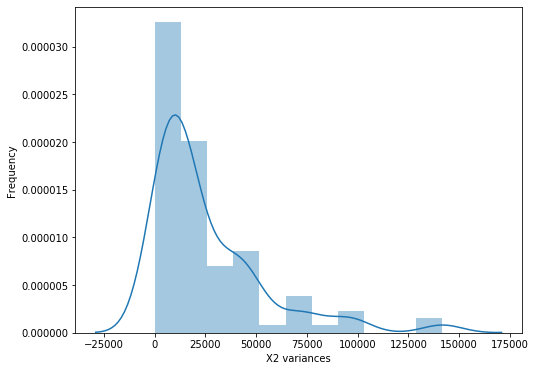

In [15]:
plt.figure(figsize = (8,6))
plt.xlabel('X2 variances')
plt.ylabel('Frequency')
sns.distplot(a = X2_var)

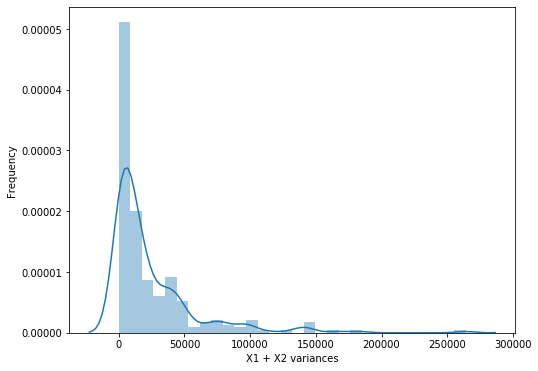

In [16]:
plt.figure(figsize = (8,6))
plt.xlabel('X1 + X2 variances')
plt.ylabel('Frequency')
sns.distplot(a = X1_X2_var)

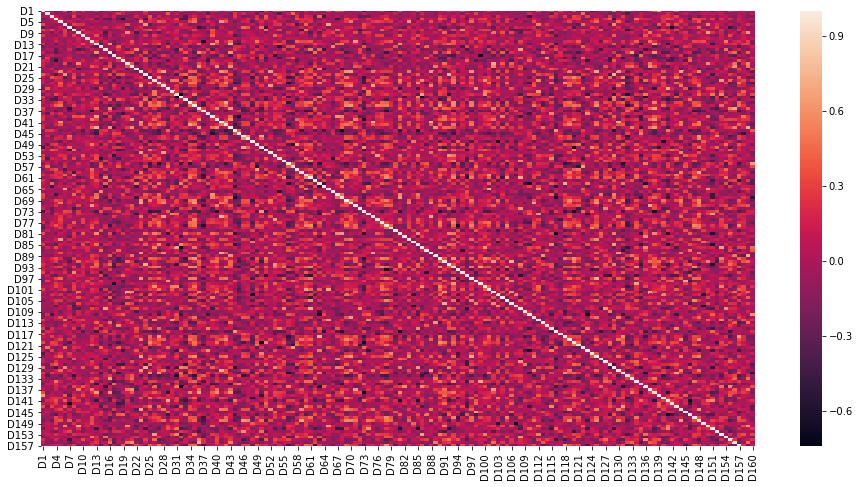

In [17]:
plt.figure(figsize = (16,8))
sns.heatmap(data_X1.corr())

### Determining best features using Univariate Selection

Univariate selection is a simple way of selecting the most influential features based on their relationship with the response variable, using simple statistical tests. There are a few classes such as SelectKBest (which returns the K best features) and SelectPercentile(which returns a desired percentile of the best features). These methods utilise statistical tests such as the chi-squared test or the f-test. Since we are dealing with a regression data set, we use the f-test.

#### Using SelectKBest on only X1

X1 has 160 features, so let us try and find out the top 20 features.

In [18]:
bestfeatures = SelectKBest(f_regression, k = 20)
model_fit = bestfeatures.fit(data_X1, data_y)

C:\Users\Siddhant\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


We can now checkout the scores of each feature in X1 with respect to the response y.

In [19]:
dfscores = pd.DataFrame(model_fit.scores_)
dfcolumns = pd.DataFrame(data_X1.columns)

In [20]:
featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
featureScores.columns = ['Features X1', 'Scores']

In [21]:
featureScores

,Features X1,Scores
0,D1,0.137172
1,D2,0.017013
2,D3,24.656643
3,D4,62.625859
4,D5,18.357504
...,...,...
155,D156,11.122141
156,D157,109.901878
157,D158,8.850263
158,D159,6.284122


Now we can print the top 20 features based on their score.

In [22]:
print(featureScores.nlargest(20, 'Scores'))

    Features X1      Scores
24          D25  215.767047
89          D90  198.879091
77          D78  189.913381
68          D69  186.284748
59          D60  185.252523
34          D35  185.044993
50          D51  112.562102
131        D132  109.974178
156        D157  109.901878
33          D34  108.716095
32          D33  105.150784
96          D97  102.878829
60          D61  101.964123
139        D140  101.736997
76          D77   91.465858
133        D134   88.826380
92          D93   86.598416
36          D37   81.232334
102        D103   71.725438
119        D120   71.316524


In [23]:
featureScores.nlargest(20, 'Scores')

,Features X1,Scores
24,D25,215.767047
89,D90,198.879091
77,D78,189.913381
68,D69,186.284748
59,D60,185.252523
34,D35,185.044993
50,D51,112.562102
131,D132,109.974178
156,D157,109.901878
33,D34,108.716095


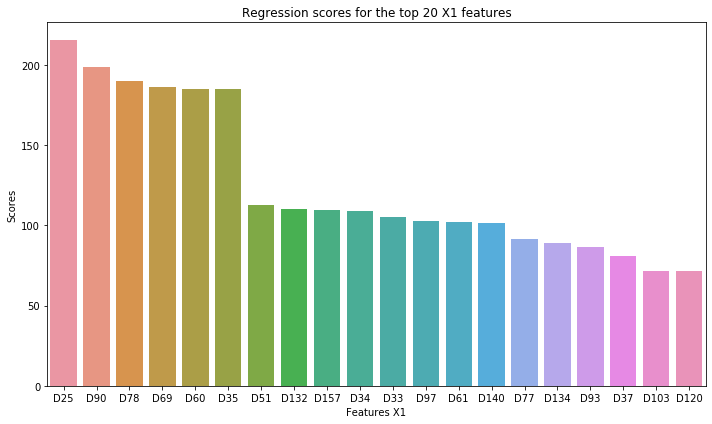

In [24]:
plt.figure(figsize = (10,6))
plt.title('Regression scores for the top 20 X1 features')
plt.xlabel('X1 features')
plt.ylabel('Regression scores')
sns.barplot(x = featureScores.nlargest(20, 'Scores')['Features X1'], y = featureScores.nlargest(20, 'Scores')['Scores'])
plt.tight_layout()

In [25]:
X1_top20 = pd.DataFrame(featureScores.nlargest(20, 'Scores'))


In [26]:
X1_top20_selected = []
for i in X1_top20['Features X1']:
    X1_top20_selected.append(i)

Now from our original X1 dataframe, we only select the columns which we have stored in X1_top20_selected.

Having selected our top 20 features from X1, we can now run Linear Regression with cross-validation (using 5 splits) on X1 and y, using only these top 20 features.

In [27]:
metrics = ['neg_mean_squared_error', 'explained_variance']
Z = cross_validate(LinearRegression(), data_X1[X1_top20_selected], data_y, cv=5, 
                   scoring = metrics)
avg_error = []
avg_var = []
for i in list(Z.values())[2]:
    avg_error.append(-i)
for j in list(Z.values())[3]:
    avg_var.append(j)
    
print("Average mean squared error is: ",  np.mean(np.asarray(avg_error)))
print("Average variance is: ",  np.mean(np.asarray(avg_var)))

Average mean squared error is:  752.6144647091527
Average variance is:  0.8888614189736502


#### Using SelectKBest on X1 and X2

Now that we are using both X1 and X2, we have a total of 260 features. We follow a similar method and determine the best features when using both X1 and X2.

In [28]:
bestfeatures2 = SelectKBest(f_regression, k = 20)
model_fit2 = bestfeatures.fit(data_X1_X2, data_y)

C:\Users\Siddhant\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
dfscores2 = pd.DataFrame(model_fit2.scores_)
dfcolumns2 = pd.DataFrame(data_X1_X2.columns)
featureScores2 = pd.concat([dfcolumns2, dfscores2], axis = 1)
featureScores2.columns = ['Features X1, X2', 'Scores']

In [30]:
featureScores2

,"Features X1, X2",Scores
0,D1,0.137172
1,D2,0.017013
2,D3,24.656643
3,D4,62.625859
4,D5,18.357504
...,...,...
255,D256,185.044993
256,D257,113.448262
257,D258,117.397333
258,D259,108.716095


In [31]:
print(featureScores2.nlargest(20, 'Scores'))

    Features X1, X2      Scores
213            D214  621.182103
202            D203  453.027107
219            D220  396.261688
201            D202  321.638923
220            D221  312.928448
253            D254  285.259177
188            D189  247.647696
243            D244  242.173187
242            D243  239.161026
233            D234  233.767730
198            D199  231.632868
206            D207  229.457184
212            D213  229.161687
24              D25  215.767047
169            D170  215.767047
222            D223  201.590872
231            D232  200.561985
89              D90  198.879091
163            D164  198.879091
228            D229  198.879091


We can see that features from X2 are dominant in the list of most important features. Infact, top 13 features are all from X2. In total, 18 out of the top 20 features are from X2. This suggests that when X1 and X2 are combined, features from X2 influence the response values to a much greater extent than X1.

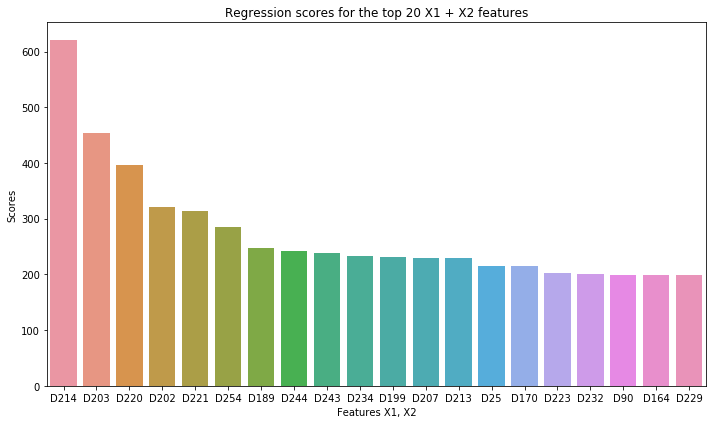

In [32]:
plt.figure(figsize = (10,6))
plt.title('Regression scores for the top 20 X1 + X2 features')
plt.xlabel('X1 + X2 features')
plt.ylabel('Regression scores')
sns.barplot(x = featureScores2.nlargest(20, 'Scores')['Features X1, X2'], y = featureScores2.nlargest(20, 'Scores')['Scores'])
plt.tight_layout()

In [33]:
X1_X2_top20 = pd.DataFrame(featureScores2.nlargest(20, 'Scores'))
X1_X2_top20_selected = []
for i in X1_X2_top20['Features X1, X2']:
    X1_X2_top20_selected.append(i)

In [34]:
X1_X2_top20_selected

['D214',
 'D203',
 'D220',
 'D202',
 'D221',
 'D254',
 'D189',
 'D244',
 'D243',
 'D234',
 'D199',
 'D207',
 'D213',
 'D25',
 'D170',
 'D223',
 'D232',
 'D90',
 'D164',
 'D229']

In [35]:
metrics = ['neg_mean_squared_error', 'explained_variance']
Z1 = cross_validate(LinearRegression(), data_X1_X2[X1_X2_top20_selected], data_y, cv=5, 
                   scoring = metrics)
avg_error = []
avg_var = []
for i in list(Z1.values())[2]:
    avg_error.append(-i)
for j in list(Z1.values())[3]:
    avg_var.append(j)
    
print("Average mean squared error is: ",  np.mean(np.asarray(avg_error)))
print("Average variance is: ",  np.mean(np.asarray(avg_var)))

Average mean squared error is:  413.22679278370725
Average variance is:  0.9388384014422082


We can clearly a sharp decrease in the mean squared error when use the top features from the combined feature matrix of X1 and X2 (which is clearly dominated by X2), indicating that features from X2 are much better predictors for the response variable y.


### Determining best features using Lasso Regression

Regression models benefit from scaling, so we use the scaled versions of the data.

Before performing lasso regression, we first define a few functions and explain the setup.

1. Lasso regression is dependent on a hyperparamter called alpha. The higher the value of alpha, the more the penalisation. Lasso regression with alpha = 0 is the same as linear regression. The first function 'get_best_alpha' comoutes the optimum value of alpha which gives the best selection of features. Note that this is not the value of alpha which results in the minimum mean squared error (alpha_min), but rather the value of alpha which is around 1 standard deviation away from alpha_min and gives the best selection of features, by setting the coefficients of all the non essential features to 0. 

2. The second function 'get_best_features' uses this above value of alpha to compute the indices of the best features. To compute the best features, we run bootstrapping(the number of times can be specified as input in the function) on our samples (on a sample of size 80% of our original sample) and only select the features which appear at least x% of the time i.e have a confidence level of x%, where x is specified as input. The indices of these features are stored in a list called 'final_selected_feat_indices'. We can compare this list of indices from when we run it on only features from X1, to when we run it on features from both X1 and X2. 

3. Now that we we have our selection of best features, we perform a linear regression (using cross validation with 5 folds, run as many times as specified) on our dataset, but this time we use only our selected features. We compute the mean squared error and the variance. This way we can compare the selection of features from X1, to the selection of features from both X1 and X2, and see which set of features does a better job of predicting the corresponding values in y. We can then understand features from which dataset have a bigger influence on y. 

4. The final function simply prints out the names of the features (as given originally in the dataset), when their indices is given as input.

#### We first perform lasso regression on features only from X1.
    
    

In [37]:



# X_train, X_test, y_train, y_test = train_test_split(data_X1_scaled, data_y, test_size = 0.3)
# model = SelectFromModel(Lasso(alpha = 2))
# model.fit(X_train, y_train)



In [38]:
# model.get_support()

In [39]:
# selected_feat_indices = pd.DataFrame(X_train).columns[(model.get_support())]
# print('total features: {}'.format((X_train.shape[1])))
# print('selected features: {}'.format(len(selected_feat)))
# print('features with coefficients shrank to zero: {}'.format(
#       np.sum(model.estimator_.coef_ == 0)))

In [40]:
# selected_feat_indices

In [41]:
# selected_features = []
# for i in range(len(selected_feat)):
#     c = selected_feat[i]
#     print(c)
#     selected_features.append("D{}".format(c+1))

In [81]:
def get_best_alpha(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
    lasso = LassoCV(cv=5, random_state=0).fit(X_train, y_train)
    predictions = lasso.predict(X_test)
    cv_mean = np.mean(lasso.mse_path_, axis=1)
    cv_std = np.std(lasso.mse_path_, axis=1)
    idx_min_mean = np.argmin(cv_mean)
    idx_alpha = np.where(
        (cv_mean <= cv_mean[idx_min_mean] + cv_std[idx_min_mean]) &
        (cv_mean >= cv_mean[idx_min_mean]))[0][0]
    alpha_lse = lasso.alphas_[idx_alpha].max()
    alpha_min = lasso.alphas_[idx_min_mean]
    
    return alpha_lse



def get_best_features(alpha, A, b, n, cl): #cl is confidence level and has to be between 0 and 1
    final_selected_feat_indices = []
    index_scores = {}
    for i in range(n):
        boot_index = np.random.choice(len(A),int(np.ceil(0.8*len(A))),replace=True)
        X_train, X_test, y_train, y_test = train_test_split(A[boot_index], b.iloc[boot_index], test_size = 0.3)
        model = SelectFromModel(Lasso(alpha = alpha))
        model.fit(X_train, y_train)
        selected_feat_indices = pd.DataFrame(X_train).columns[(model.get_support())]
        for i in (selected_feat_indices):
            if str(i) not in (index_scores.keys()):
                index_scores[str(i)] = 0

        for i in (selected_feat_indices):
            index_scores[str(i)] = index_scores[str(i)] + 1
            
    for j in (index_scores.keys()):
        if index_scores[j]>=(np.ceil(cl*n)):
            final_selected_feat_indices.append(int(j))

    return final_selected_feat_indices, index_scores

def cv_sel_feat(model, C, d, cv, alpha, m, n, cl):
    avg_error = []
    avg_var = []
    p = get_best_features(alpha, C, d, n, cl)
    z = p[0]
    for k in range(m):
        Z3 = cross_validate(model, pd.DataFrame(C)[z], d, cv = cv, 
                            scoring = ['neg_mean_squared_error', 'explained_variance'])
        a = []
        b = []

        for i in list(Z3.values())[2]:
            a.append(-i)
        for j in list(Z3.values())[3]:
            b.append(j)
        
        avg_error.append(np.mean(np.asarray(a)))
        avg_var.append(np.mean(np.asarray(b)))

    print("The indices of the best features are: ", z)
    
    selected_features = []
    for i in range(len(z)):
        c = z[i]
        selected_features.append("D{}".format(c+1))
    z1 = p[1]
    print("The best features are: ", selected_features)
    print("The number of best features are: ", len(selected_features))
    print("The number of non-zero coefficient features are: ", len(z1.keys()))
    print("The number of zero coefficient features are: ", len(pd.DataFrame(C).columns) - len(z1.keys()))
    
    print("Average mean squared error using only the best features is: ",  np.mean(np.asarray(avg_error)))
    print("Average variance using only the best features is: ",  np.mean(np.asarray(avg_var)))
    
    
    xs = []
    ys = []
    for k in z:
        if str(k) in z1.keys():
            xs.append("D{}".format(k+1))
            ys.append(z1[str(k)])
            
    plt.figure(figsize = (16,8))
    plt.title('Frequency of features')
    plt.xlabel('Features')
    plt.ylabel('Frequency')
    sns.barplot(x = xs, y = ys)
    
    
    
def print_best_features(alpha, A, b, cl):
    k = get_best_features(alpha, A, b, cl)
    selected_features = []
    for i in range(len(k)):
        c = k[i]
        selected_features.append("D{}".format(c+1))
    return selected_features
    
    


In [51]:
avg_error = []
avg_var = []
for k in range(50):
        Z3 = cross_validate(LinearRegression(), data_X1_scaled, data_y, cv = 5, 
                            scoring = ['neg_mean_squared_error', 'explained_variance'])
        a = []
        b = []

        for i in list(Z3.values())[2]:
            a.append(-i)
        for j in list(Z3.values())[3]:
            b.append(abs(j))
        
        avg_error.append(np.mean(np.asarray(a)))
        avg_var.append(np.mean(np.asarray(b)))
print("Average mean squared error is: ",  np.mean(np.asarray(avg_error)))
print("Average variance is: ",  np.mean(np.asarray(avg_var)))

Average mean squared error is:  8795.307161072107
Average variance is:  0.8310784282176591


C:\Users\Siddhant\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The indices of the best features are:  [24, 32, 34, 50, 59, 61, 68, 76, 77, 89, 102, 128, 131, 139, 33, 60]
The best features are:  ['D25', 'D33', 'D35', 'D51', 'D60', 'D62', 'D69', 'D77', 'D78', 'D90', 'D103', 'D129', 'D132', 'D140', 'D34', 'D61']
The number of best features are:  16
The number of non-zero coefficient features are:  96
The number of zero coefficient features are:  64
Average mean squared error using only the best features is:  414.8974817851647
Average variance using only the best features is:  0.9400107199858138


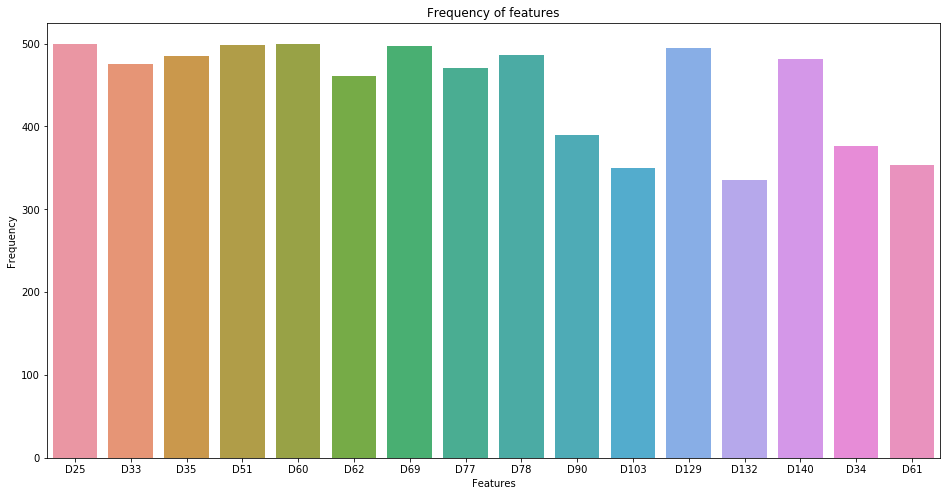

In [83]:
#Getting the best indices of the best features by performing bootstrapping 500 times with a 65% confidence level.
#Then performing Linear Regression with Cross validation 50 times, with 5 splits. 

cv_sel_feat(LinearRegression(), data_X1_scaled, data_y, 5, get_best_alpha(data_X1_scaled, data_y), 50, 500, 0.65)

#### We now perform feature selection using features from both X1 and X2

We use the same functions which were previously defined, and only change the inputs. We do not change the number of times we perform bootstrapping and cross validation for consistency.

C:\Users\Siddhant\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The indices of the best features are:  [181, 192, 198, 201, 202, 206, 213, 220, 222, 233, 219]
The best features are:  ['D182', 'D193', 'D199', 'D202', 'D203', 'D207', 'D214', 'D221', 'D223', 'D234', 'D220']
The number of best features are:  11
The number of non-zero coefficient features are:  66
The number of zero coefficient features are:  194
Average mean squared error using only the best features is:  271.8606843606589
Average variance using only the best features is:  0.9608061033855406


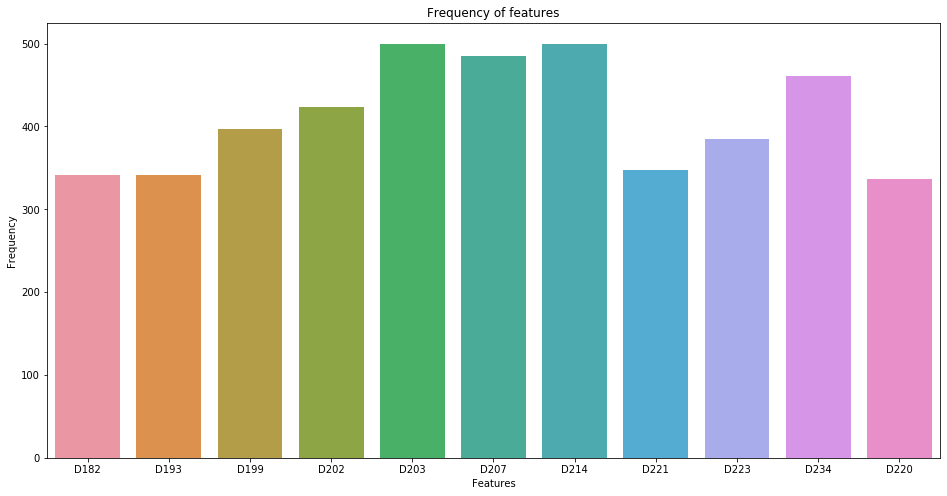

In [84]:
cv_sel_feat(LinearRegression(), data_X1_X2_scaled, data_y, 5, get_best_alpha(data_X1_X2_scaled, data_y), 50, 500, 0.65)

We see that even though the number of features satisfying the threshold of confidence level is less, they are only features from X2, suggesting that X2 has a better correlation with the output y. The mean squared error is also less.

In [52]:
avg_error = []
avg_var = []
for k in range(50):
        Z3 = cross_validate(LinearRegression(), data_X1_X2_scaled, data_y, cv = 5, 
                            scoring = ['neg_mean_squared_error', 'explained_variance'])
        a = []
        b = []

        for i in list(Z3.values())[2]:
            a.append(-i)
        for j in list(Z3.values())[3]:
            b.append(abs(j))
        
        avg_error.append(np.mean(np.asarray(a)))
        avg_var.append(np.mean(np.asarray(b)))
print("Average mean squared error is: ",  np.mean(np.asarray(avg_error)))
print("Average variance is: ",  np.mean(np.asarray(avg_var)))

Average mean squared error is:  8804.274080126545
Average variance is:  0.8306444615421488


### Feature selection using ElasticNet regression

Elastic Net regression is another form of regularised regression, however has an additional L2 penalty term. 

The setup remains the same. The only change is that all experiments are performed using Elastic Net regression instead of Lasso regression.

In [85]:
def get_best_alpha2(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
    lasso = ElasticNetCV(cv=5, random_state=0).fit(X_train, y_train)
    predictions = lasso.predict(X_test)
    cv_mean = np.mean(lasso.mse_path_, axis=1)
    cv_std = np.std(lasso.mse_path_, axis=1)
    idx_min_mean = np.argmin(cv_mean)
    idx_alpha = np.where(
        (cv_mean <= cv_mean[idx_min_mean] + cv_std[idx_min_mean]) &
        (cv_mean >= cv_mean[idx_min_mean]))[0][0]
    alpha_lse = lasso.alphas_[idx_alpha].max()
    alpha_min = lasso.alphas_[idx_min_mean]
    
    return alpha_lse


def get_best_features2(alpha, A, b, n, cl): #cl is confidence level and has to be between 0 and 1
    final_selected_feat_indices = []
    index_scores = {}
    for i in range(n):
        boot_index = np.random.choice(len(A),int(np.ceil(0.8*len(A))),replace=True)
        X_train, X_test, y_train, y_test = train_test_split(A[boot_index], b.iloc[boot_index], test_size = 0.3)
        model = SelectFromModel(ElasticNet(alpha = alpha))
        model.fit(X_train, y_train)
        selected_feat_indices = pd.DataFrame(X_train).columns[(model.get_support())]
        for i in (selected_feat_indices):
            if str(i) not in (index_scores.keys()):
                index_scores[str(i)] = 0

        for i in (selected_feat_indices):
            index_scores[str(i)] = index_scores[str(i)] + 1
            
    for j in (index_scores.keys()):
        if index_scores[j]>=(np.ceil(cl*n)):
            final_selected_feat_indices.append(int(j))

    return final_selected_feat_indices, index_scores


def cv_sel_feat2(model, C, d, cv, alpha, m, n, cl):
    avg_error = []
    avg_var = []
    p = get_best_features2(alpha, C, d, n, cl)
    z = p[0]
    for k in range(m):
        Z3 = cross_validate(model, pd.DataFrame(C)[z], d, cv = cv, 
                            scoring = ['neg_mean_squared_error', 'explained_variance'])
        a = []
        b = []

        for i in list(Z3.values())[2]:
            a.append(-i)
        for j in list(Z3.values())[3]:
            b.append(j)
        
        avg_error.append(np.mean(np.asarray(a)))
        avg_var.append(np.mean(np.asarray(b)))

    print("The indices of the best features are: ", z)
    
    selected_features = []
    for i in range(len(z)):
        c = z[i]
        selected_features.append("D{}".format(c+1))
    z1 = p[1]
    print("The number of best features are: ", len(selected_features))
    print("The best features are: ", selected_features)
    print("The number of non-zero coefficient features are: ", len(z1.keys()))
    print("The number of zero coefficient features are: ", len(pd.DataFrame(C).columns) - len(z1.keys()))
    
    print("Average mean squared error using only the best features is: ",  np.mean(np.asarray(avg_error)))
    print("Average variance using only the best features is: ",  np.mean(np.asarray(avg_var)))
    
    
    xs = []
    ys = []
    for k in z:
        if str(k) in z1.keys():
            xs.append("D{}".format(k+1))
            ys.append(z1[str(k)])
            
    plt.figure(figsize = (18,8))
    plt.title('Frequency of features')
    plt.xlabel('Features')
    plt.ylabel('Frequency')
    sns.barplot(x = xs, y = ys)
    plt.tight_layout()
    

#### We first perform feature selection using Elastic Net regression on only features from X1

C:\Users\Siddhant\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The indices of the best features are:  [2, 3, 7, 15, 17, 24, 26, 30, 32, 33, 34, 36, 41, 47, 50, 52, 53, 57, 59, 60, 61, 63, 68, 76, 77, 85, 89, 91, 92, 95, 96, 99, 100, 102, 104, 110, 112, 118, 119, 124, 127, 128, 130, 131, 133, 139, 140, 142, 150, 156, 31]
The number of best features are:  51
The best features are:  ['D3', 'D4', 'D8', 'D16', 'D18', 'D25', 'D27', 'D31', 'D33', 'D34', 'D35', 'D37', 'D42', 'D48', 'D51', 'D53', 'D54', 'D58', 'D60', 'D61', 'D62', 'D64', 'D69', 'D77', 'D78', 'D86', 'D90', 'D92', 'D93', 'D96', 'D97', 'D100', 'D101', 'D103', 'D105', 'D111', 'D113', 'D119', 'D120', 'D125', 'D128', 'D129', 'D131', 'D132', 'D134', 'D140', 'D141', 'D143', 'D151', 'D157', 'D32']
The number of non-zero coefficient features are:  129
The number of zero coefficient features are:  31
Average mean squared error using only the best features is:  333.6940244632661
Average variance using only the best features is:  0.94933260821439


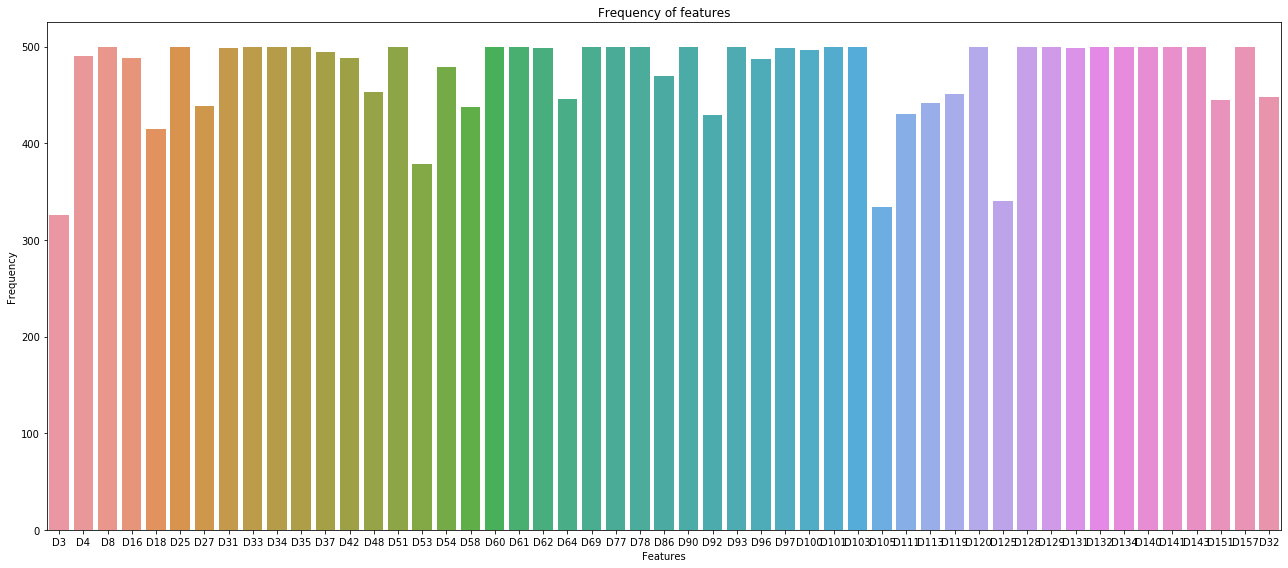

In [86]:
cv_sel_feat2(LinearRegression(), data_X1_scaled, data_y, 5, get_best_alpha(data_X1_scaled, data_y), 50, 500, 0.65)

#### We now perform feature selection using Elastic Net regression on features from X1 and X2

C:\Users\Siddhant\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The indices of the best features are:  [7, 15, 24, 30, 32, 33, 34, 36, 50, 59, 60, 61, 68, 76, 77, 89, 92, 96, 127, 128, 131, 133, 139, 156, 160, 163, 167, 168, 169, 170, 173, 174, 181, 182, 183, 185, 186, 188, 189, 190, 192, 194, 196, 197, 198, 199, 201, 202, 203, 204, 206, 208, 210, 211, 212, 213, 214, 215, 216, 217, 219, 220, 221, 222, 225, 226, 228, 230, 231, 232, 233, 236, 238, 240, 241, 242, 243, 244, 247, 248, 251, 253, 254, 255, 256, 257, 258, 259, 3, 99, 100, 195]
The number of best features are:  92
The best features are:  ['D8', 'D16', 'D25', 'D31', 'D33', 'D34', 'D35', 'D37', 'D51', 'D60', 'D61', 'D62', 'D69', 'D77', 'D78', 'D90', 'D93', 'D97', 'D128', 'D129', 'D132', 'D134', 'D140', 'D157', 'D161', 'D164', 'D168', 'D169', 'D170', 'D171', 'D174', 'D175', 'D182', 'D183', 'D184', 'D186', 'D187', 'D189', 'D190', 'D191', 'D193', 'D195', 'D197', 'D198', 'D199', 'D200', 'D202', 'D203', 'D204', 'D205', 'D207', 'D209', 'D211', 'D212', 'D213', 'D214', 'D215', 'D216', 'D217', 'D218',

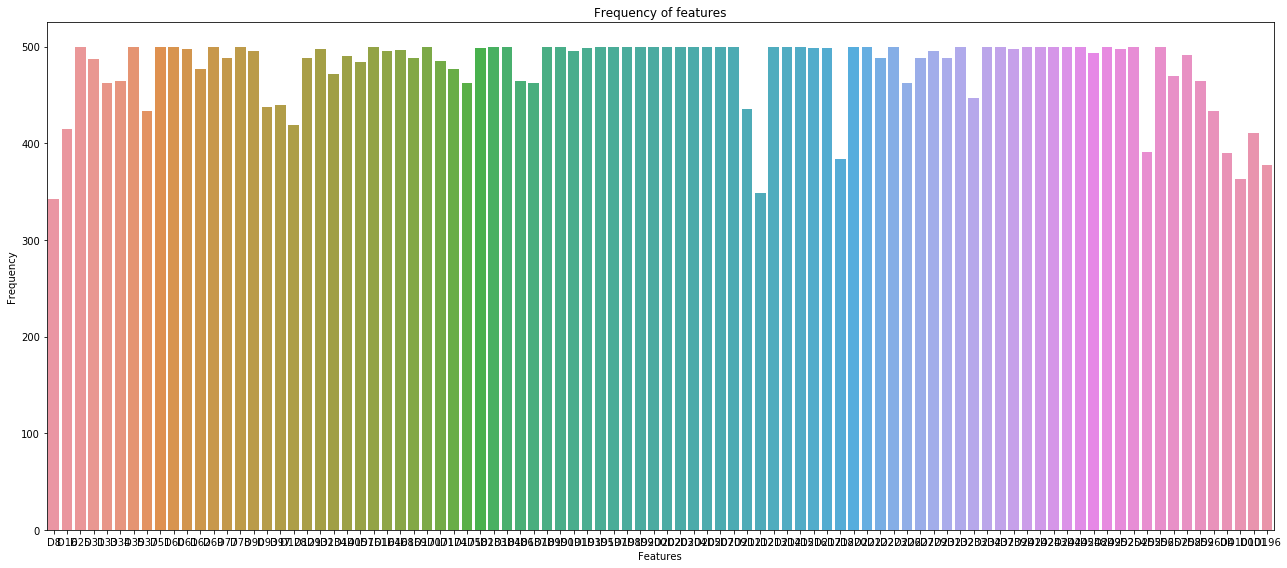

In [88]:
cv_sel_feat2(LinearRegression(), data_X1_X2_scaled, data_y, 5, get_best_alpha(data_X1_X2_scaled, data_y), 50, 500, 0.65)